Title of the Analysis
---

Short description of what's being done
* Data:
* Aim:
* Challenges: 

# Getting Started

Here, we load in all required packages, the data and if necesssary, additional annotations.

## Load Packages

Load in all relevant packages and set the python paths. Configure plotting parameters, set a directory for figures, results and the data.

In [163]:
# Autoreload settings
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [164]:
# only want to see warning once
import warnings
warnings.filterwarnings(action='once') 

In [165]:
# import standard packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from importlib import reload
import seaborn as sns
from tqdm import tqdm
import scipy
import os
import sys
import re

In [166]:
# set the path to the home directory of this project
base_path = os.path.dirname(os.getcwd())
base_path

'/projects/utility_functions'

In [167]:
# if it exists, load in a paths.py file
try:
    import paths
    print('Found a paths.py file.')
    paths = paths.get_paths()
    print(paths)
except:
    print('No paths.py file found. ')

Found a paths.py file.
{'utility_functions': '/projects/utility_functions/'}


In [168]:
# add to the python path
try:
    sys.path.insert(0, paths["utility_functions"])
    
    # import custom modules (should be in the python path now)
    import utils
    
    print("Added to the python path and imported custom modules.")
except:
    print('Did not add anythin to the python path.')
# ... add more to the python path

Added to the python path and imported custom modules.


In [169]:
# import scanpy, scvelo and velocyto
import scanpy as sc
import scvelo as scv

In [170]:
# logging
scv.logging.print_versions()

scvelo==0.1.16  scanpy==1.4  anndata==0.6.18  loompy==2.0.17  numpy==1.15.4  scipy==1.2.0  matplotlib==3.0.2  sklearn==0.20.2  pandas==0.24.0  


In [171]:
# parameters for scvelo and scanpy
scv.settings.set_figure_params(frameon = True, style='scvelo')
sc.settings.verbosity = 3 

## Set up Paths for Writing and Reading

In [172]:
# set up paths for writing adata files, for importing data and 
# for saving figuresb
create_dirs = True

In [173]:
if create_dirs:
    
    # manage dirs for reading, writing and saving figures
    write_path = utils.create_dir('write', base_path)
    data_path = utils.create_dir('data', base_path)
    figures_path = utils.create_dir('figures', base_path)

Found directory '/projects/utility_functions/write'
Found directory '/projects/utility_functions/data'
Found directory '/projects/utility_functions/figures'


In [174]:
# check the figures directories
scv.settings.figdir, sc.settings.figdir

('/projects/utility_functions/figures', '/projects/utility_functions/figures')

## Import Data

In [175]:
# import data
adata = sc.datasets.paul15()

... storing 'paul15_clusters' as categorical


In [176]:
# make unique
adata.var_names_make_unique()

In [177]:
# cell and gene numbers
adata

AnnData object with n_obs × n_vars = 2730 × 3451 
    obs: 'paul15_clusters'
    uns: 'iroot'

In [178]:
# spliced and unspliced numbers
scv.utils.show_proportions(adata)

Abundance of []: []


## Additional Annotations

Import additionall annotations. Ideally, the path would be stored in ```paths```, or given relative to the ```base_path```.

In [179]:
paths

{'utility_functions': '/projects/utility_functions/'}

In [180]:
base_path

'/projects/utility_functions'

In [181]:
# label mitochondtial genes
regex = re.compile('^(mt).*', re.IGNORECASE)
mito_genes = [l for l in adata.var_names for m in [regex.search(l)] if m]
adata.var['mito'] = False
adata.var.loc[mito_genes, 'mito'] = True
print('Found {} mito genes and annotated.'.format(len(mito_genes)))

Found 15 mito genes and annotated.


In [182]:
mito_genes[:5]

['Mt1', 'Mt2', 'Mta1', 'Mta2', 'Mta3']

In [183]:
# label batches
adata.obs['batch'] = '1'
adata.obs.loc[adata.obs_names[:int(adata.n_obs/2)], 'batch'] = '0'

In [184]:
# compute qc metrics
sc.pp.calculate_qc_metrics(adata, qc_vars=['mito'], inplace=True)
adata.obs.head()

,paul15_clusters,batch,n_genes_by_counts,log1p_n_genes_by_counts,total_counts,log1p_total_counts,pct_counts_in_top_50_genes,pct_counts_in_top_100_genes,pct_counts_in_top_200_genes,pct_counts_in_top_500_genes,total_counts_mito,log1p_total_counts_mito,pct_counts_mito
0,7MEP,0,277,5.627621,353.0,5.869297,33.427762,49.858357,78.186969,100.000000,0.0,0.000000,0.000000
1,15Mo,0,1021,6.929517,2556.0,7.846590,31.259781,41.979656,55.555556,79.616588,9.0,2.302585,0.352113
2,3Ery,0,1466,7.290975,4649.0,8.444622,22.112282,31.490643,44.246074,68.186707,43.0,3.784190,0.924930
3,15Mo,0,1415,7.255591,4486.0,8.408939,27.440927,36.714222,49.264378,71.912617,11.0,2.484907,0.245207
4,3Ery,0,1505,7.317212,5205.0,8.557567,21.690682,30.605187,43.342939,67.877041,45.0,3.828641,0.864553


## Quality Control

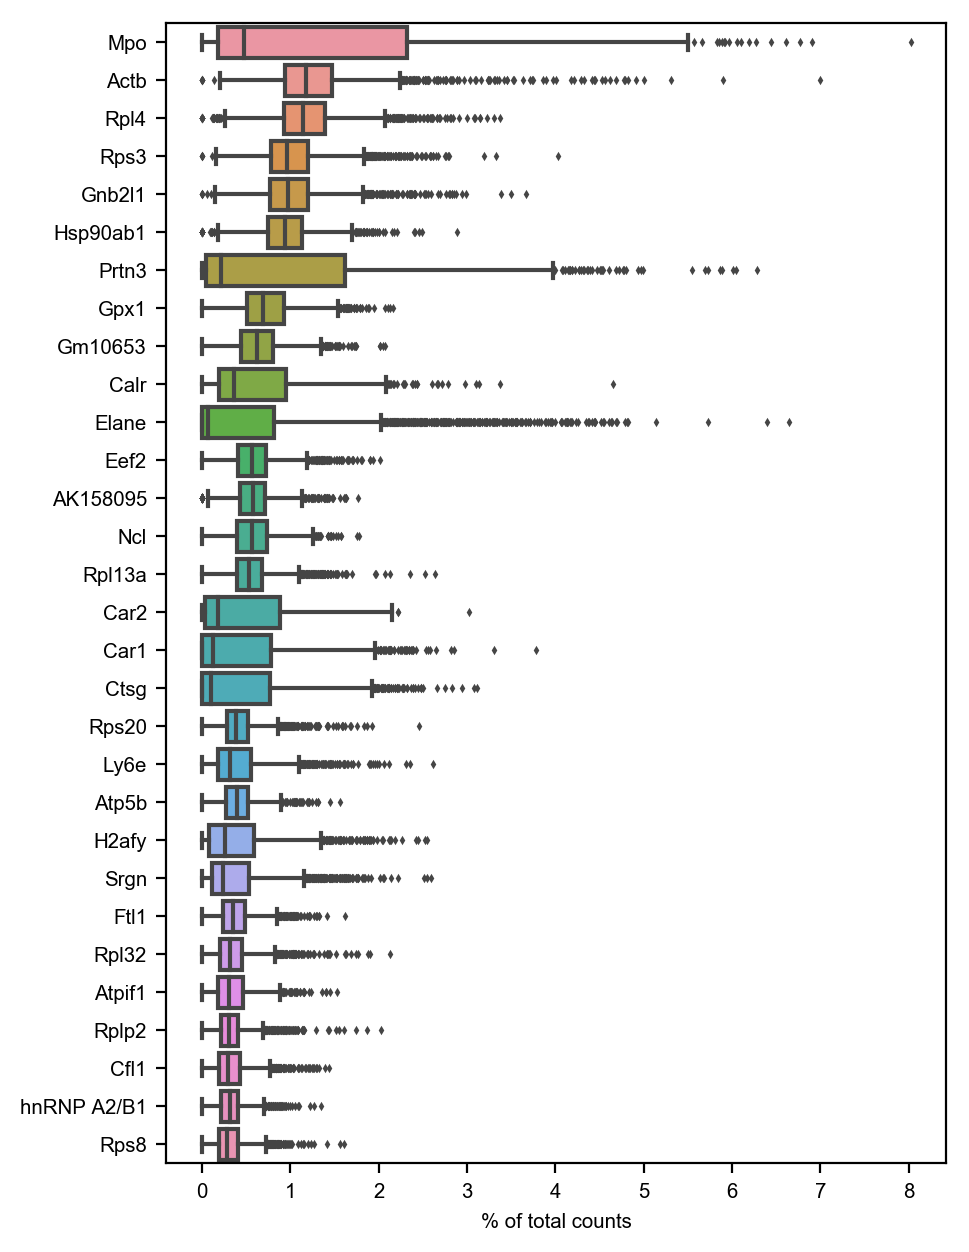

In [185]:
# start with looking at counts in the raw adata object
sc.pl.highest_expr_genes(adata)

... storing 'batch' as categorical


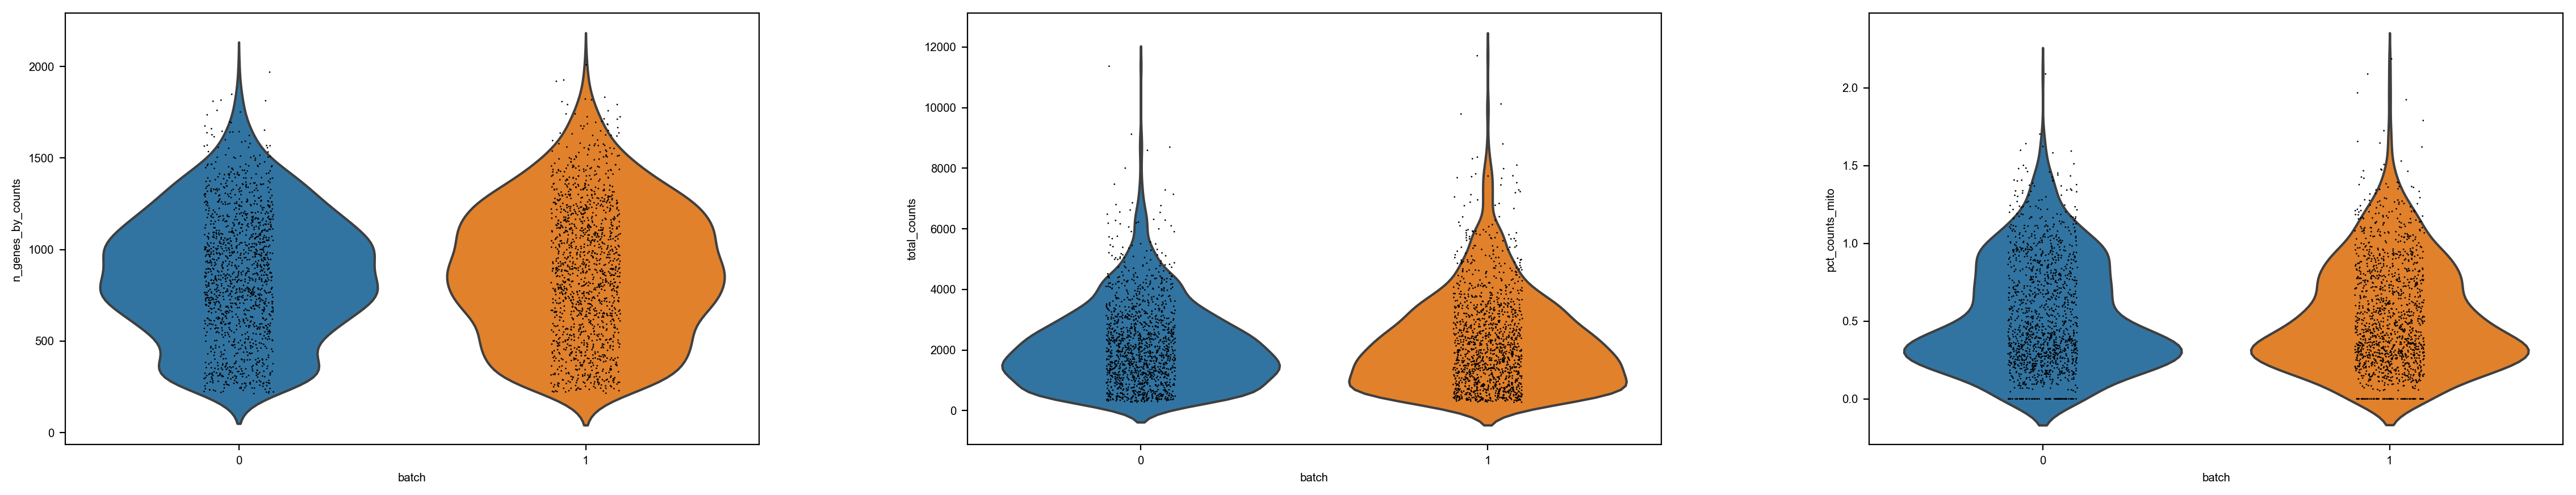

In [186]:
# check out quality metric across batches
sc.pl.violin(adata, ['n_genes_by_counts', 'total_counts', 'pct_counts_mito'], groupby='batch')

In [187]:
# visualise as histograms
utils.interactive_histograms(adata, keys=['n_genes_by_counts', 'total_counts', 'pct_counts_mito'])

Loading BokehJS ...

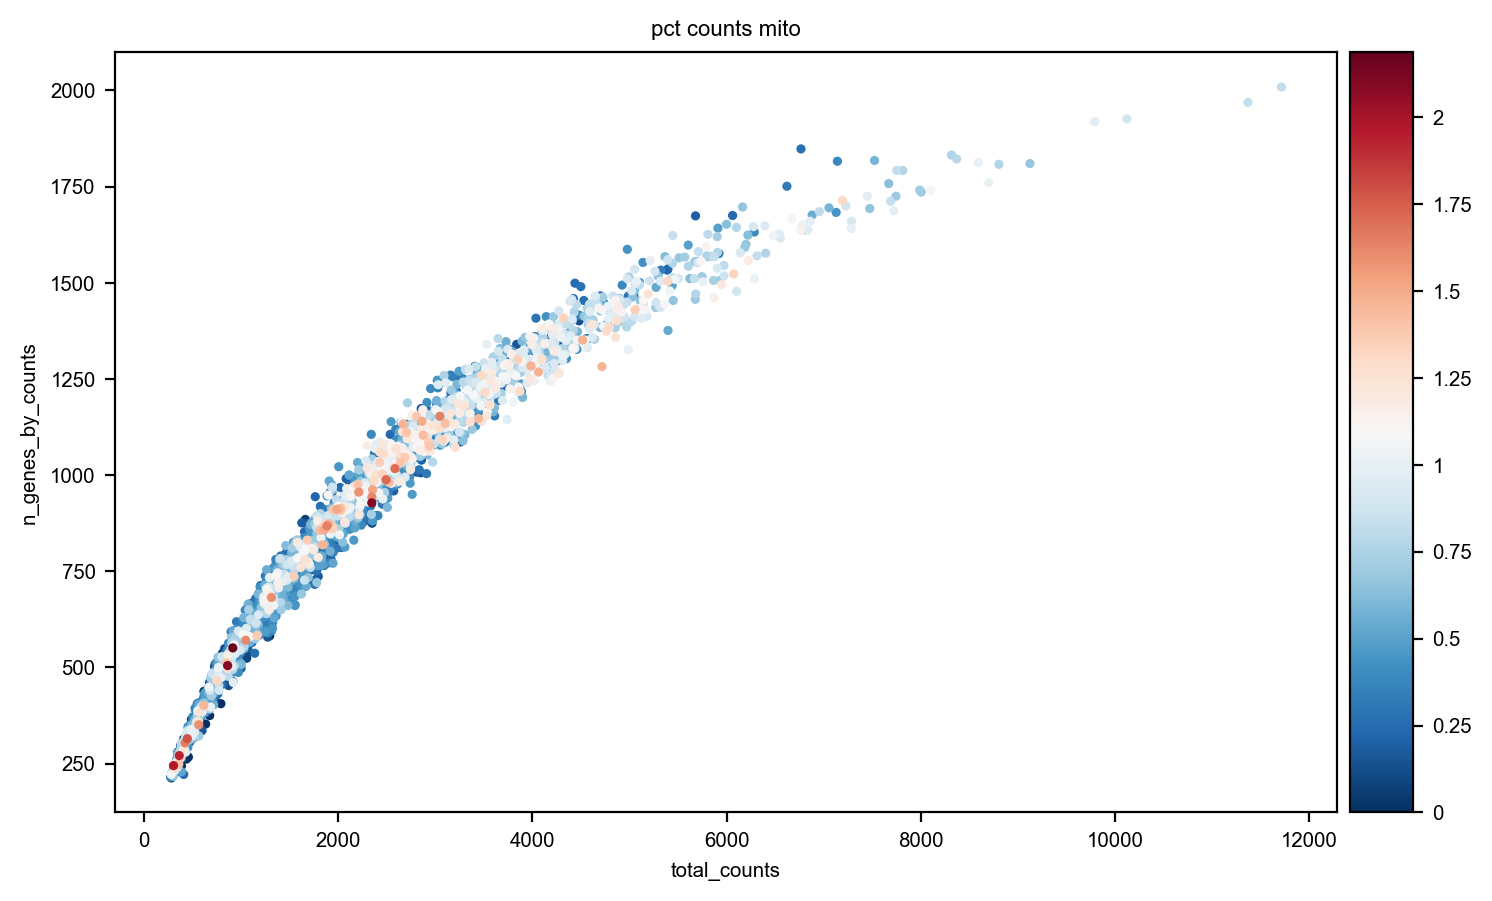

In [188]:
# plot percentage of mitochondtial genes versus count depth and n_genes
sc.pl.scatter(adata, x='total_counts', y='n_genes_by_counts', color='pct_counts_mito')

## Filtering

We will filter out the human and the viral genes, and we will look at some quality measures for the actual mouse genes.

In [189]:
utils.print_numbers(adata, groupby='batch', save_numbers='original_numbers')

1365 cells in batch 0
1365 cells in batch 1
Total: 2730 cells, 3451 genes


In [190]:
# basic filtering of cells and genes
sc.pp.filter_cells(adata, min_genes=200)
# filter based on spliced/unspliced reads per cell
scv.pp.filter_genes(adata, min_counts=20, min_counts_u=10, min_cells=3)
utils.print_numbers(adata, groupby='batch')

1365 cells in batch 0
1365 cells in batch 1
Total: 2730 cells, 3451 genes


In [191]:
# filter cells based on total counts/n_genes
adata = adata[adata.obs['total_counts'] < 8000].copy()
utils.print_numbers(adata, groupby='batch')

1360 cells in batch 0
1358 cells in batch 1
Total: 2718 cells, 3451 genes


In [192]:
# filter cells based on mitochondtial activity
adata = adata[adata.obs['pct_counts_mito'] < 2]
utils.print_numbers(adata, groupby='batch')

1359 cells in batch 0
1356 cells in batch 1
Total: 2715 cells, 3451 genes


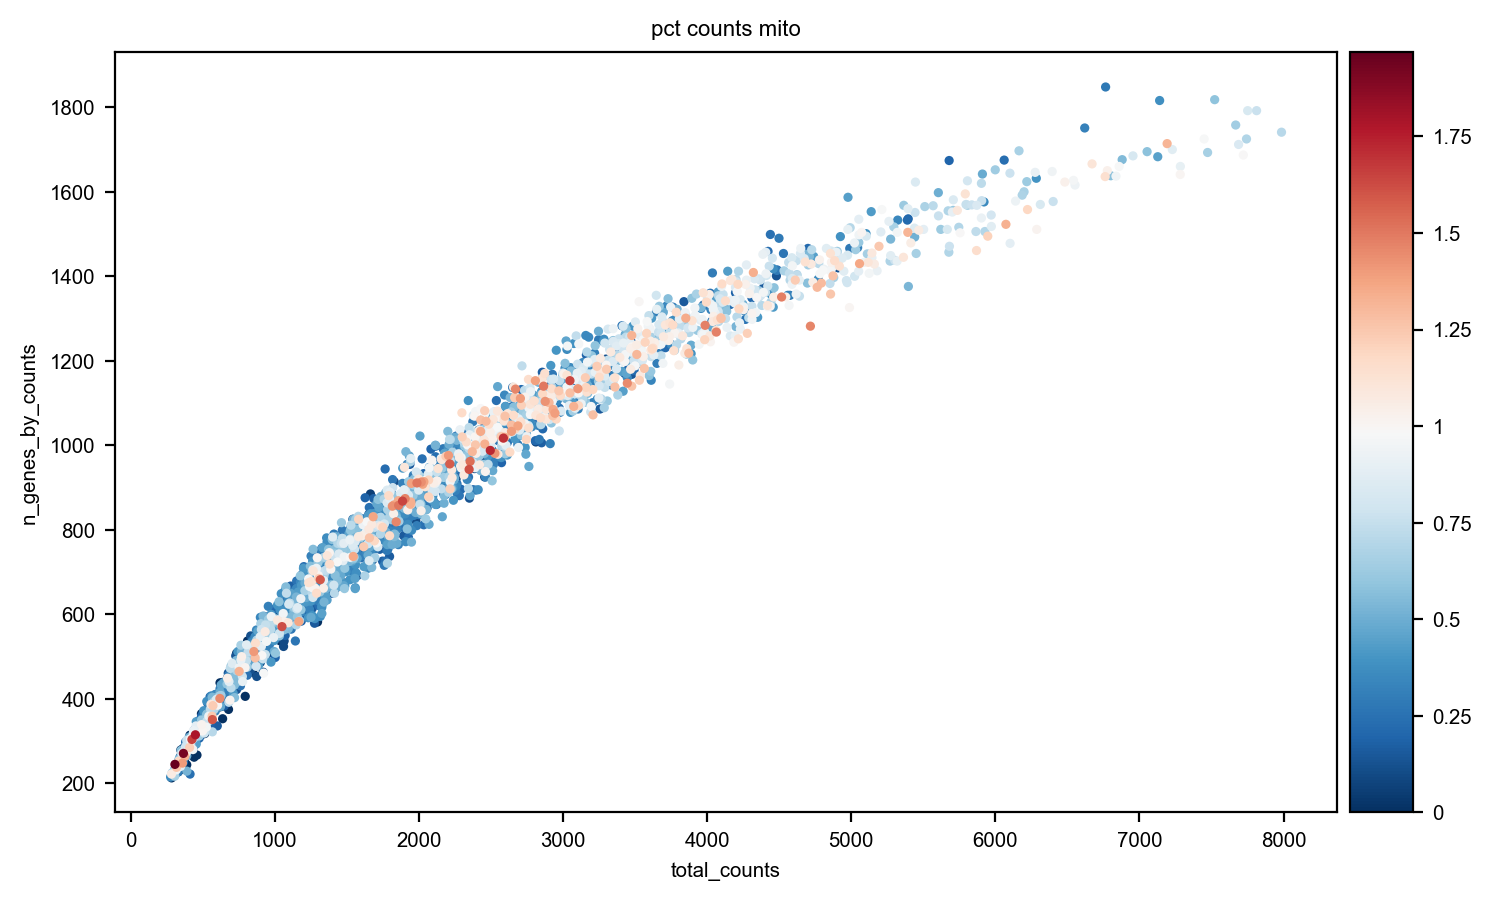

In [193]:
sc.pl.scatter(adata, x='total_counts', y='n_genes_by_counts', color='pct_counts_mito')

In [194]:
# Give out some information on the filtering
utils.print_filtering(adata)

In total: 
Filtered out 15 cells or 0.55 %.

By batch
Filtered out 6 cells or 0.44 % of batch 0.
Filtered out 9 cells or 0.66 % of batch 1.


## Normalisation

In [195]:
# normalize per cell - we use scvelo here to normalize to initial cell size
scv.pp.normalize_per_cell(adata, use_initial_size=True)

Normalized count data: X.


In [196]:
# log transform and set .raw
adata.raw = sc.pp.log1p(adata, copy=True)
sc.pp.log1p(adata)

In [197]:
# batch effect removal
sc.pp.combat(adata, key='batch')

Standardizing Data across genes.
found 2 batches
found 0 categorical variables:	
Fitting L/S model and finding priors
Finding parametric adjustments
/home/marius/anaconda3/envs/scvelo_bench/lib/python3.6/site-packages/scanpy/preprocessing/_combat.py:196: RuntimeWarning: divide by zero encountered in true_divide
  b_prior[i],


Adjusting data


In [198]:
# filter on highly variable genes
sc.pp.highly_variable_genes(adata, n_top_genes=3000)

--> added
    'highly_variable', boolean vector (adata.var)
    'means', float vector (adata.var)
    'dispersions', float vector (adata.var)
    'dispersions_norm', float vector (adata.var)


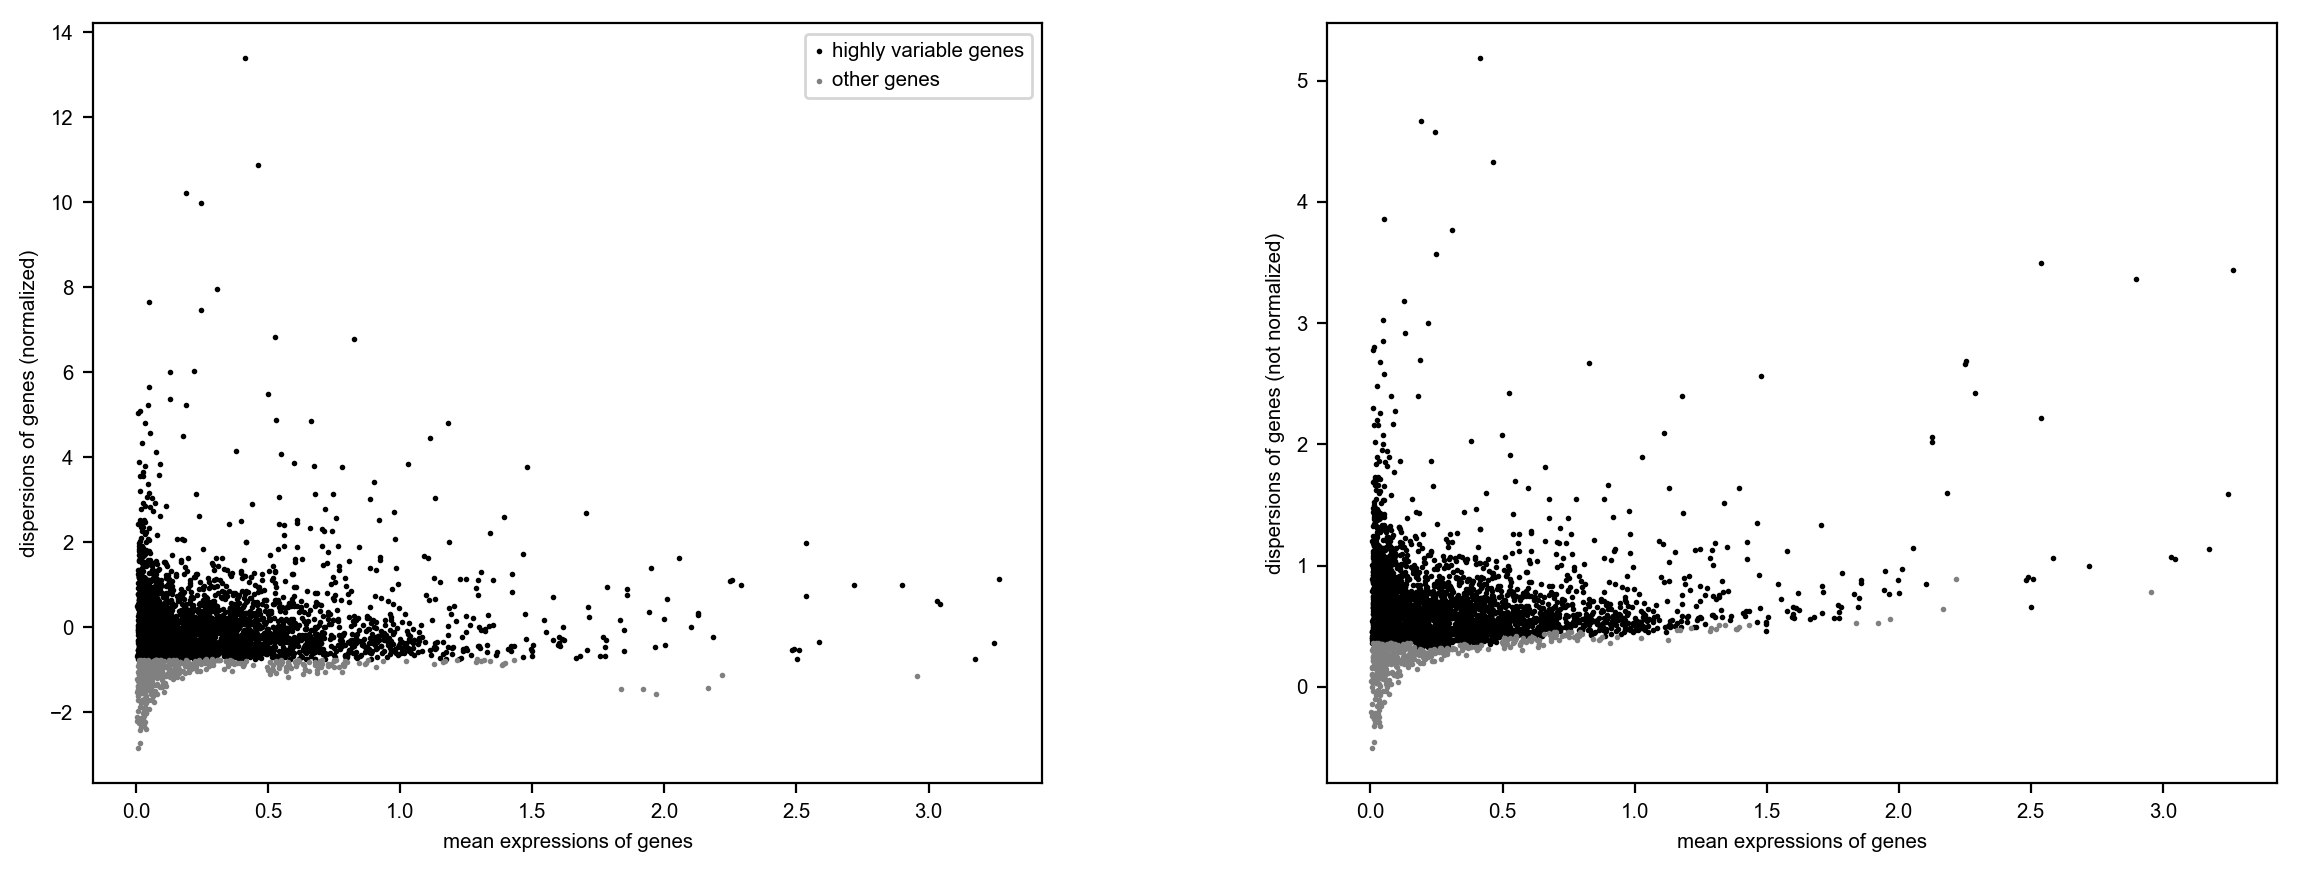

In [199]:
# plot highly variable genes
sc.pl.highly_variable_genes(adata)

In [200]:
# for scvelo, genes really need to be filtered out so far
# adata = adata[:, adata.var['highly_variable'] == True].copy()
# utils.print_numbers(adata)

In [201]:
# regress out the count depth effect
sc.pp.regress_out(adata, 'total_counts')

regressing out total_counts
    finished (0:00:07.44)


In [202]:
#scale the genes so that they equaly contribute to the PCA
sc.pp.scale(adata)

# Embedding and Clustering

Typical workflow:
- PCA, choose number of components
- Quality assesment in the PCA space
- Compute a KNN graph
- Compute UMAP, force directed layout, tSNE, etc
- Run Louvain or Leiden clustering

In [203]:
# Comptue PCA representation
sc.tl.pca(adata, svd_solver='arpack')

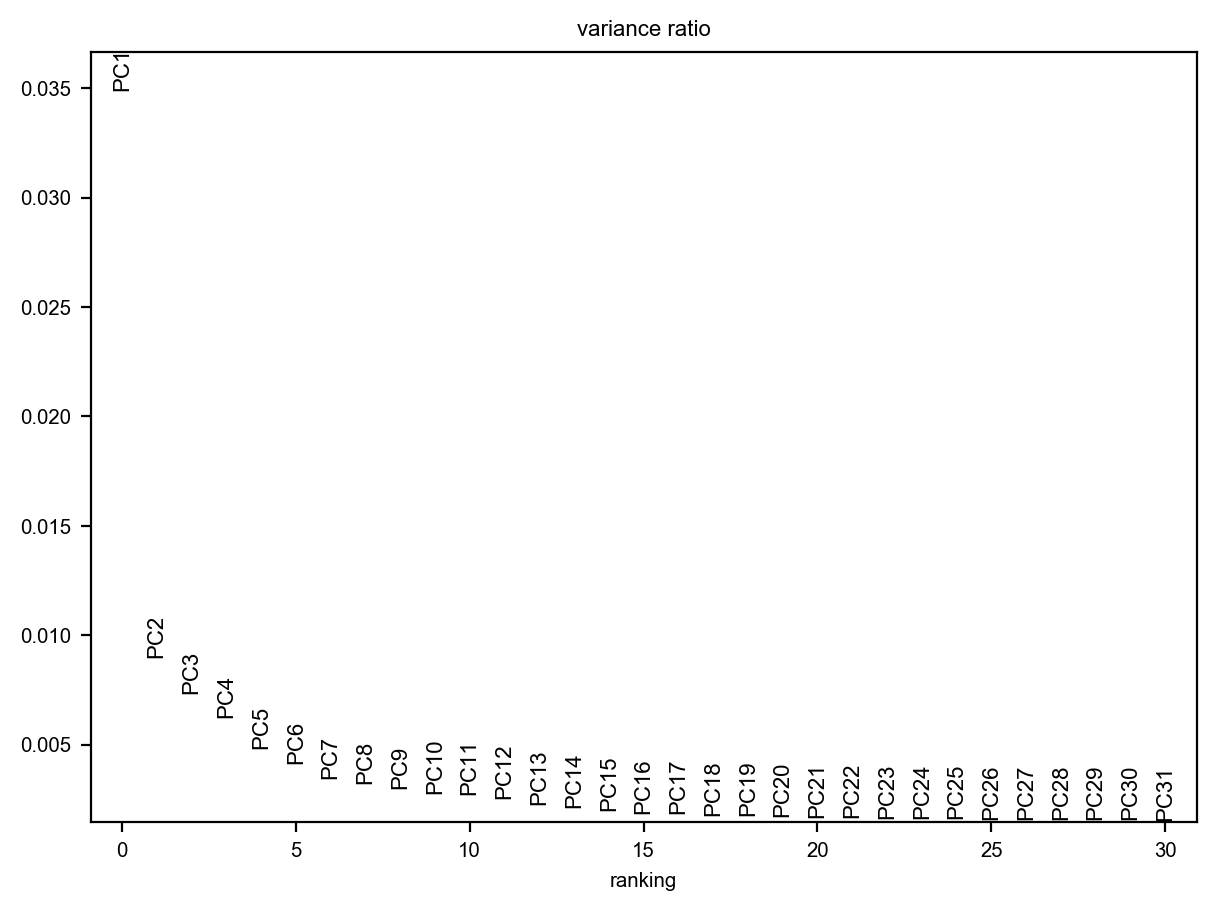

In [204]:
# Look at variance distribution
sc.pl.pca_variance_ratio(adata)

In [205]:
# set a number of pc's to be used in downstream analysis
n_pcs = 11

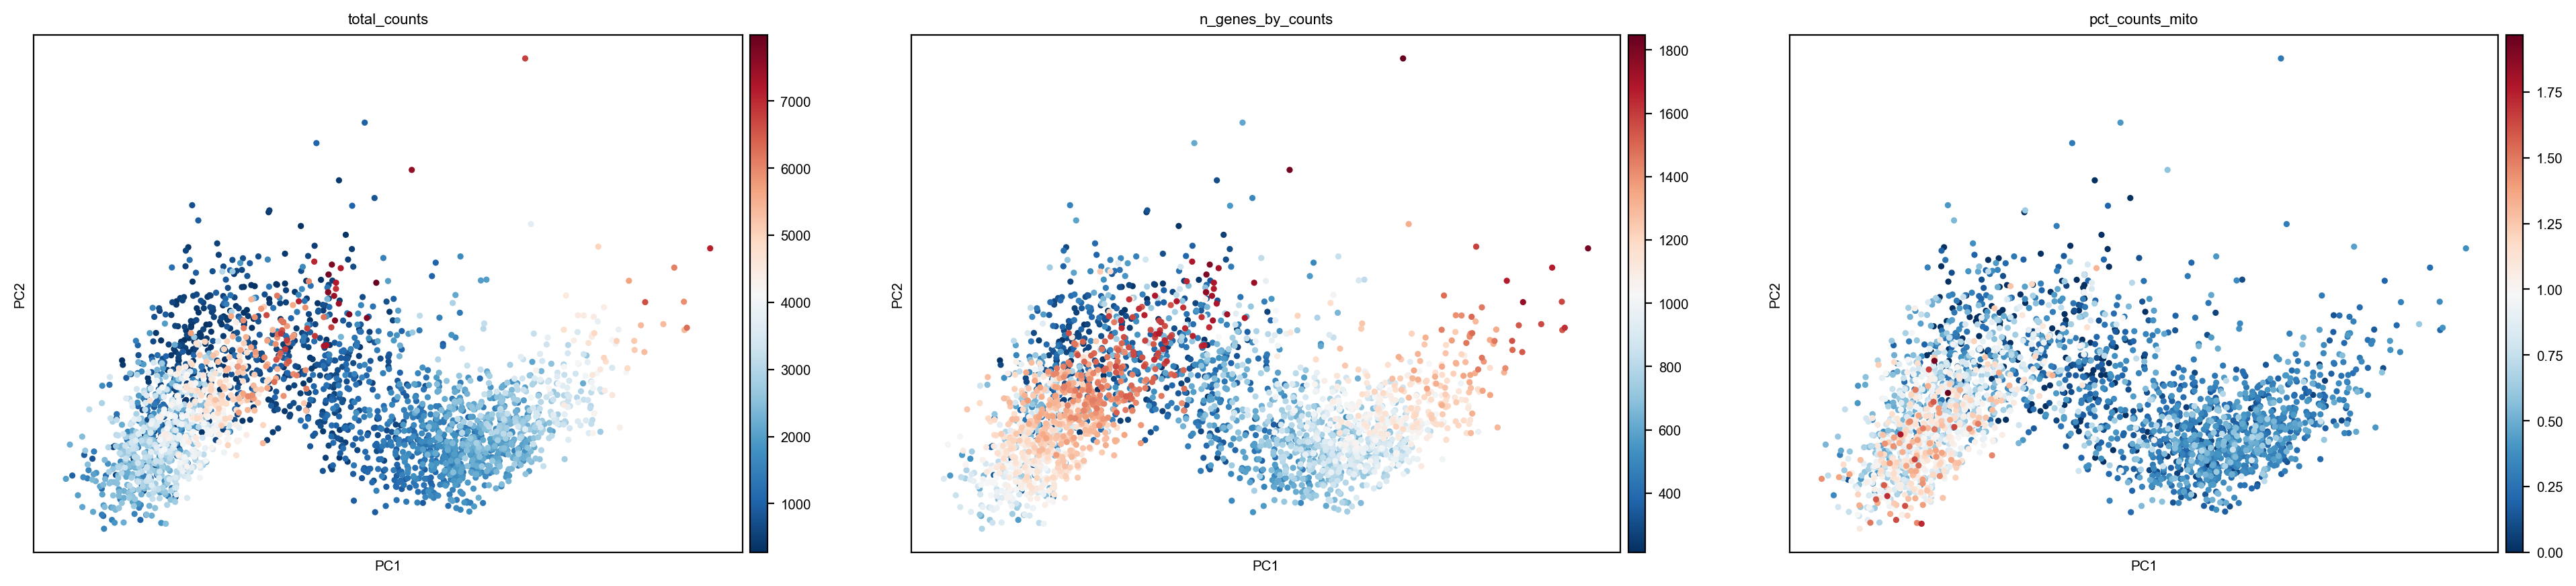

In [206]:
# Look at quality metrics in the PCA plot
sc.pl.pca(adata, color=['total_counts', 'n_genes_by_counts', 'pct_counts_mito'])

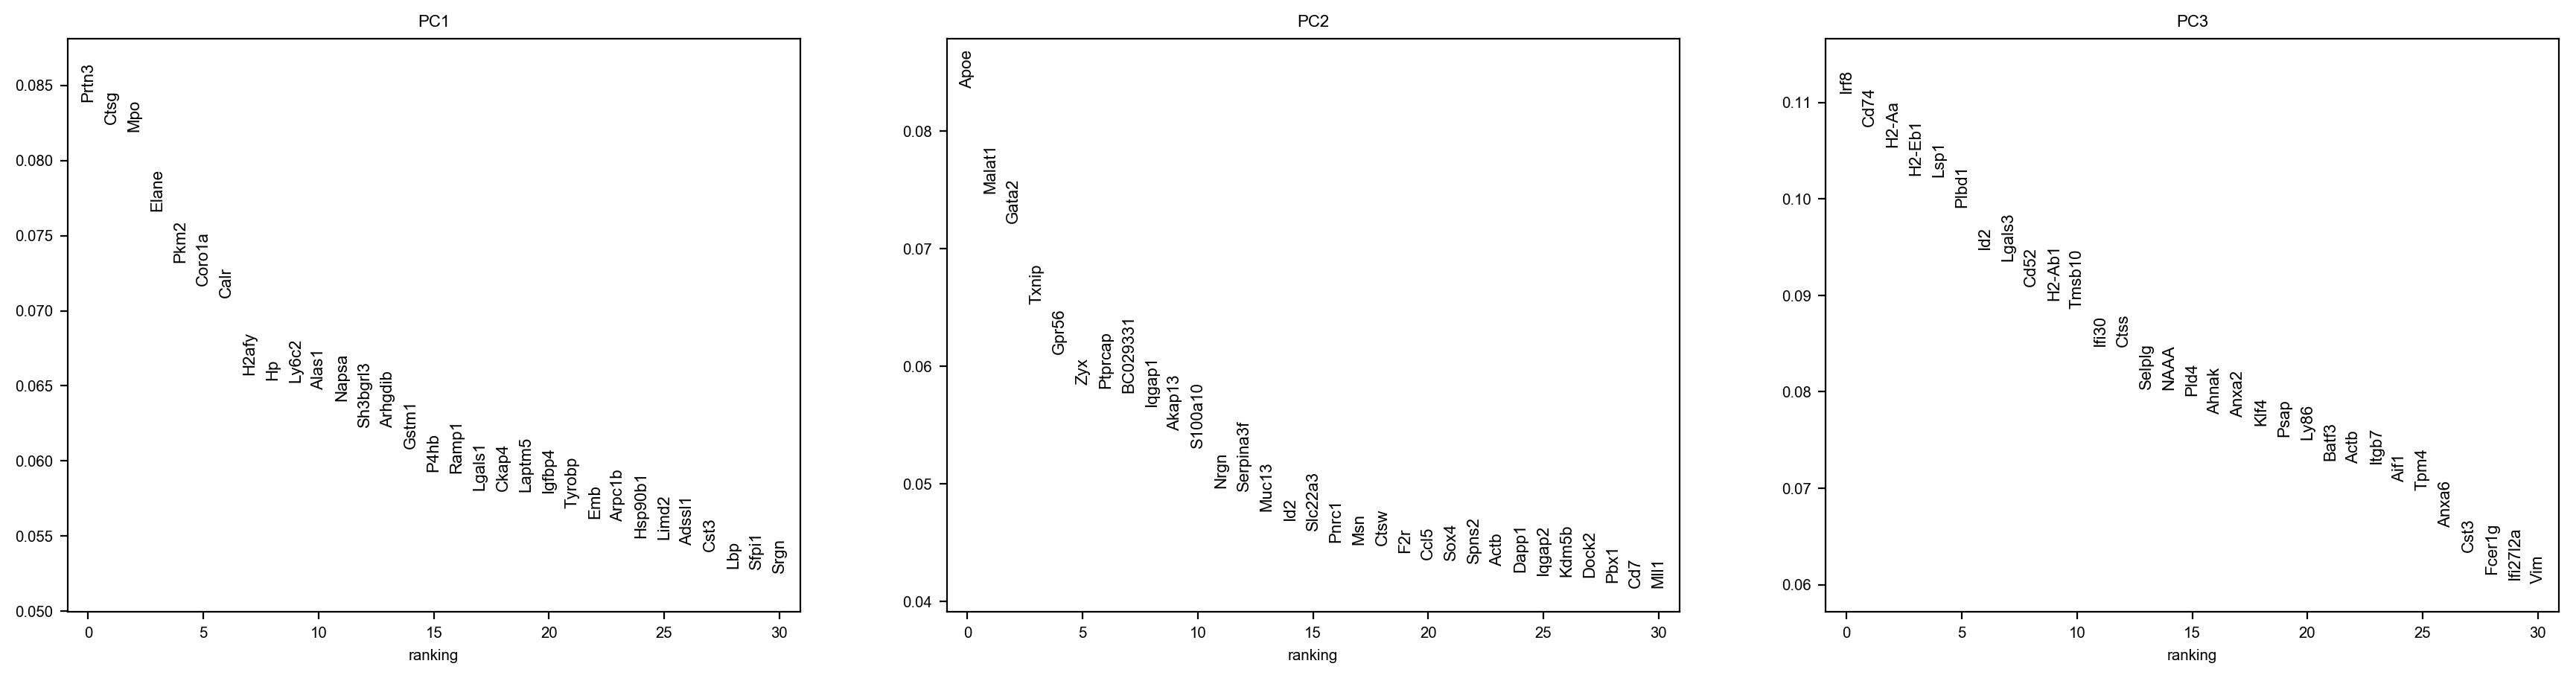

In [207]:
# Check the loadings
sc.pl.pca_loadings(adata)

In [208]:
# Look at correlations
utils.corr_ann(adata, obs_keys=['total_counts', 'n_genes_by_counts', 'pct_counts_mito'])

Correlation between 'total_counts' and component 1 of basis 'pca' is -0.00.
Correlation between 'total_counts' and component 2 of basis 'pca' is -0.00.
Correlation between 'n_genes_by_counts' and component 1 of basis 'pca' is 0.02.
Correlation between 'n_genes_by_counts' and component 2 of basis 'pca' is -0.08.
Correlation between 'pct_counts_mito' and component 1 of basis 'pca' is -0.57.
Correlation between 'pct_counts_mito' and component 2 of basis 'pca' is -0.23.


**Interpretetation:**

In [209]:
# compute the neighborhood graph
sc.pp.neighbors(adata, n_neighbors=30, n_pcs=n_pcs, random_state=42)

computing neighbors
    using 'X_pca' with n_pcs = 11
    finished (0:00:00.78) --> added to `.uns['neighbors']`
    'distances', distances for each pair of neighbors
    'connectivities', weighted adjacency matrix


In [210]:
# comptue clustering
sc.tl.louvain(adata, resolution=0.2, random_state=42)

running Louvain clustering
    using the "louvain" package of Traag (2017)


/home/marius/anaconda3/envs/scvelo_bench/lib/python3.6/site-packages/numpy/matrixlib/defmatrix.py:68: PendingDeprecationWarning: the matrix subclass is not the recommended way to represent matrices or deal with linear algebra (see https://docs.scipy.org/doc/numpy/user/numpy-for-matlab-users.html). Please adjust your code to use regular ndarray.
  return matrix(data, dtype=dtype, copy=False)


    finished (0:00:00.27) --> found 4 clusters and added
    'louvain', the cluster labels (adata.obs, categorical)


In [211]:
# compute UMAP
sc.tl.umap(adata, random_state=42)

computing UMAP
    finished (0:00:06.94) --> added
    'X_umap', UMAP coordinates (adata.obsm)


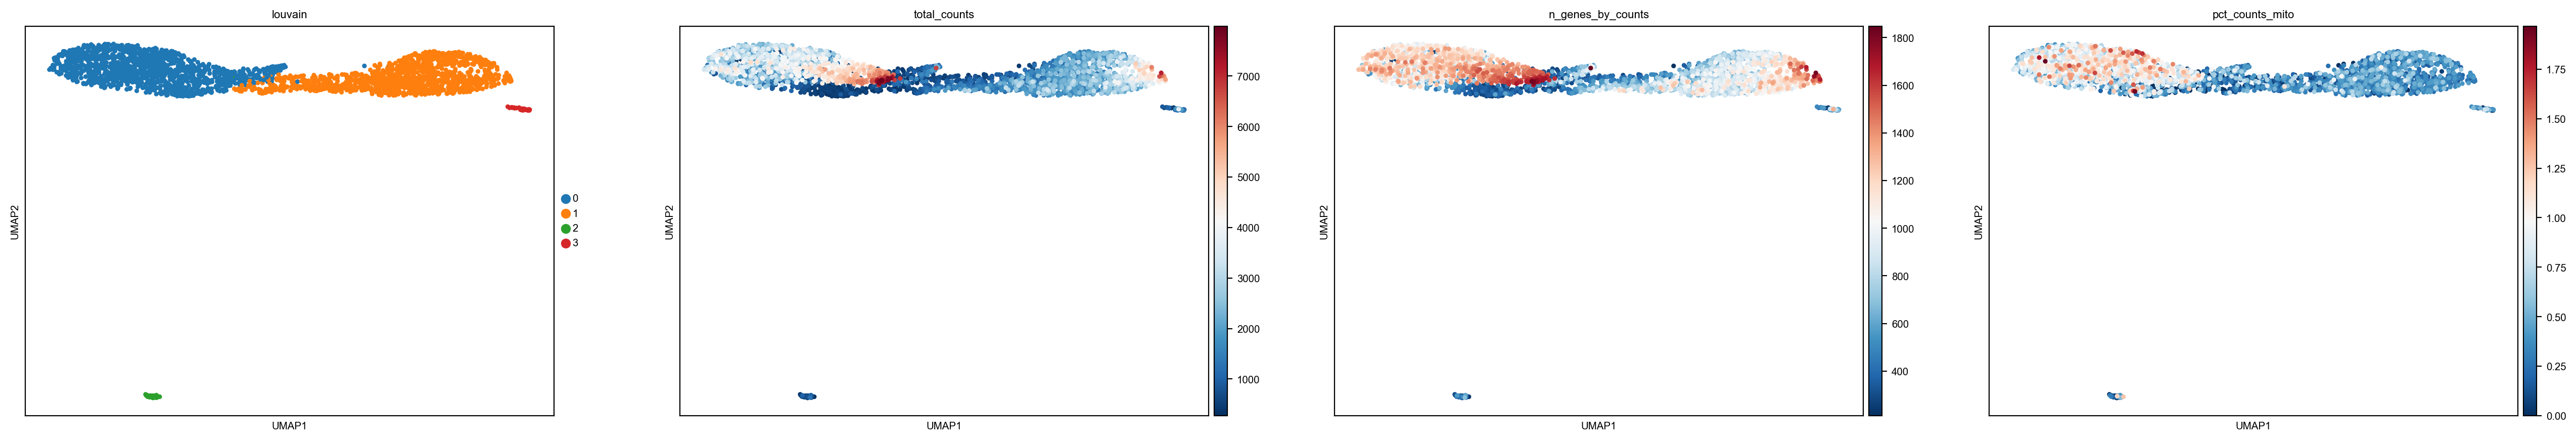

In [212]:
# plot the umap
sc.pl.umap(adata, color=['louvain', 'total_counts', 'n_genes_by_counts', 'pct_counts_mito'])

In [213]:
# Correlation of annotations with UMAP dimensions
utils.corr_ann(adata, obs_keys=['total_counts', 'n_genes_by_counts', 'pct_counts_mito'], basis='umap')

Correlation between 'total_counts' and component 1 of basis 'umap' is -0.11.
Correlation between 'total_counts' and component 2 of basis 'umap' is 0.22.
Correlation between 'n_genes_by_counts' and component 1 of basis 'umap' is -0.10.
Correlation between 'n_genes_by_counts' and component 2 of basis 'umap' is 0.26.
Correlation between 'pct_counts_mito' and component 1 of basis 'umap' is -0.58.
Correlation between 'pct_counts_mito' and component 2 of basis 'umap' is 0.23.


**Interpretation:**

In [214]:
# asses the batch effect in here
try:
    utils.quant_batch(adata, key='batch', basis='umap')
except:
    print('No batch key present.')

Silhouette coefficient in basis 'umap' for the labels given by 'batch' is 0.00


# Cluster Annotation

Typical workflow:
- Statistical testing: which genes mark the clusters?
- Plotting of these genes onto the embedding
- Plotting of further known marker genes on the embedding
- Cluster annotation

# Dynamics

Typical workflow:
- Compute PAGA
- Compute Diffmap
- Choose root cell
- Compute dpt in diffmap space
- Visualise gene expression as a function of dpt, possibly along different trajectories

# Velocities

Typical workflow:

- Compute the velocities using scVelo
- Compute a velocity graph and visualise velocities and their confidence on the embedding
- Look at velocities and expression levels for important genes, check consistency
- Compute cell fates
- Compute root and final cells
- Compute a velocity based pseudotime
- Look at gene expression along this new pseudotime